The Method of Least Squares

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
little_women = pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/little_women.csv")
little_women 

,Characters,Periods
0,21759,189
1,22148,188
2,20558,231
3,25526,195
4,23395,255
5,14622,140
6,14431,131
7,22476,214
8,33767,337
9,18508,185


In [6]:
little_women1 = little_women.set_index('Periods')
little_women1

,Characters
Periods,
189,21759
188,22148
231,20558
195,25526
255,23395
140,14622
131,14431
214,22476
337,33767


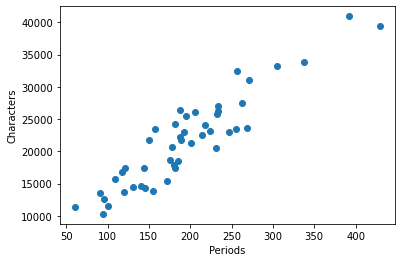

In [7]:
plt.scatter(little_women['Periods'], little_women['Characters'])
plt.ylabel('Characters')
plt.xlabel('Periods')
plt.show()

In [8]:
def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

In [9]:
correlation(little_women, 'Periods', 'Characters')

0.9229576895854816

Error in Estimation 

In [10]:
def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table[y])/np.std(table[x])

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table[y]) - a * np.mean(table[x])

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table[x] + b

In [11]:
lw_with_predictions = little_women.copy()
lw_with_predictions['Linear Prediction'] = fit(little_women, 'Periods', 'Characters')
lw_with_predictions

,Characters,Periods,Linear Prediction
0,21759,189,21183.596794
1,22148,188,21096.618953
2,20558,231,24836.666127
3,25526,195,21705.463842
4,23395,255,26924.134317
5,14622,140,16921.682573
6,14431,131,16138.882001
7,22476,214,23358.042826
8,33767,337,34056.317301
9,18508,185,20835.685429


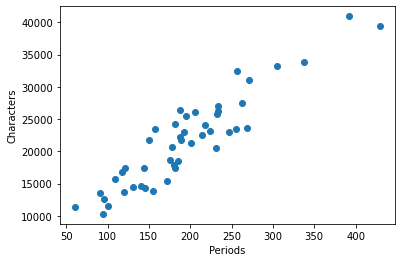

In [12]:
plt.scatter(lw_with_predictions['Periods'], lw_with_predictions['Characters'])
plt.xlabel('Periods')
plt.ylabel('Characters')
plt.show()

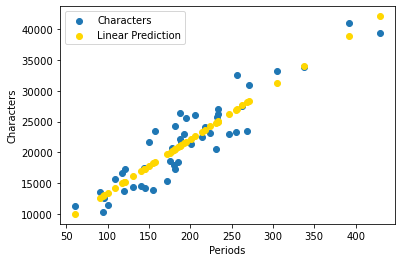

In [13]:
plt.scatter(lw_with_predictions['Periods'], lw_with_predictions['Characters'], label = 'Characters')
plt.scatter(lw_with_predictions['Periods'], lw_with_predictions['Linear Prediction'], color = 'gold', label = 'Linear Prediction')
plt.xlabel('Periods')
plt.ylabel('Characters')
plt.legend(loc = 'upper left')
plt.show()

In [14]:
actual = lw_with_predictions['Characters']
predicted = lw_with_predictions['Linear Prediction']
errors = actual - predicted

In [15]:
lw_with_predictions['Error'] =  errors
lw_with_predictions

,Characters,Periods,Linear Prediction,Error
0,21759,189,21183.596794,575.403206
1,22148,188,21096.618953,1051.381047
2,20558,231,24836.666127,-4278.666127
3,25526,195,21705.463842,3820.536158
4,23395,255,26924.134317,-3529.134317
5,14622,140,16921.682573,-2299.682573
6,14431,131,16138.882001,-1707.882001
7,22476,214,23358.042826,-882.042826
8,33767,337,34056.317301,-289.317301
9,18508,185,20835.685429,-2327.685429


In [16]:
lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')

In [17]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    plt.scatter(little_women['Periods'], little_women['Characters'])
    xlims = np.array([50, 450])
    plt.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plt.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope of Regression Line:     87.0 characters per period
Intercept of Regression Line: 4745.0 characters


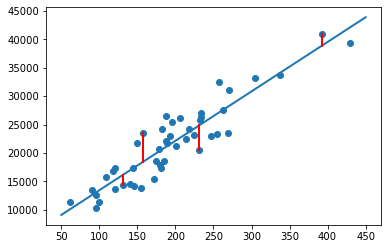

In [18]:
print('Slope of Regression Line:    ', np.round(lw_reg_slope), 'characters per period')
print('Intercept of Regression Line:', np.round(lw_reg_intercept), 'characters')
lw_errors(lw_reg_slope, lw_reg_intercept)

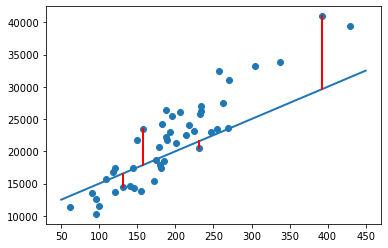

In [19]:
lw_errors(50, 10000)

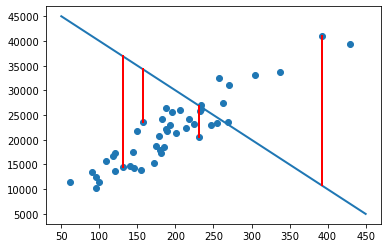

In [20]:
lw_errors(-100, 50000)

Root Mean Squared Error

In [21]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women['Periods']
    y = little_women['Characters']
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Root mean squared error: 4322.167831766537


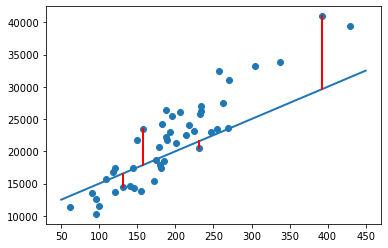

In [22]:
lw_rmse(50, 10000)

Root mean squared error: 16710.11983735375


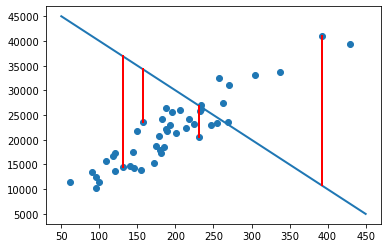

In [23]:
lw_rmse(-100, 50000)

Root mean squared error: 2715.5391063834586


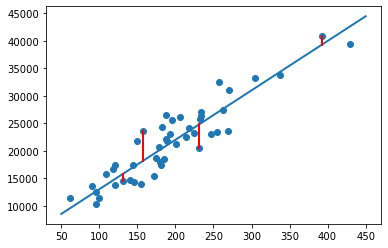

In [24]:
lw_rmse(90, 4000)

Root mean squared error: 2701.690785311856


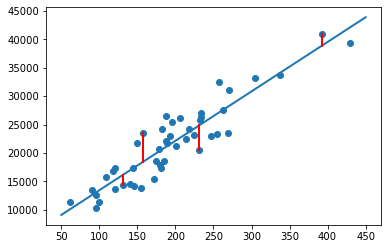

In [25]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

Numerical Optimization

In [26]:
def lw_mse(any_slope, any_intercept):
    x = little_women['Periods']
    y = little_women['Characters']
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [27]:
lw_mse(lw_reg_slope, lw_reg_intercept)**0.5

2701.690785311856

Root mean squared error: 2701.690785311856


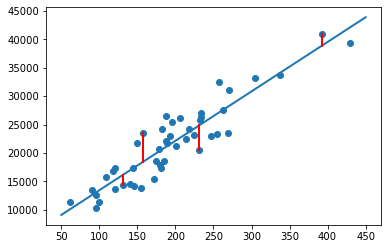

In [28]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

In [29]:
lw_mse(-100, 50000)**0.5

16710.11983735375

In [30]:
lw_mse(90, 4000)**0.5

2715.5391063834586

In [31]:
from scipy import optimize
import functools
def minimize(f, start=None, smooth=False, log=None, array=False, **vargs):
    """Minimize a function f of one or more arguments.

    Args:
        f: A function that takes numbers and returns a number

        start: A starting value or list of starting values

        smooth: Whether to assume that f is smooth and use first-order info

        log: Logging function called on the result of optimization (e.g. print)

        vargs: Other named arguments passed to scipy.optimize.minimize

    Returns either:
        (a) the minimizing argument of a one-argument function
        (b) an array of minimizing arguments of a multi-argument function
    """
    if start is None:
        assert not array, "Please pass starting values explicitly when array=True"
        arg_count = f.__code__.co_argcount
        assert arg_count > 0, "Please pass starting values explicitly for variadic functions"
        start = [0] * arg_count
    if not hasattr(start, '__len__'):
        start = [start]

    if array:
        objective = f
    else:
        @functools.wraps(f)
        def objective(args):
            return f(*args)

    if not smooth and 'method' not in vargs:
        vargs['method'] = 'Powell'
    result = optimize.minimize(objective, start, **vargs)
    if log is not None:
        log(result)
    if len(start) == 1:
        return result.x.item(0)
    else:
        return result.x

In [32]:
best = minimize(lw_mse)
best

array([  86.97784117, 4744.78484535])

In [33]:
print("slope from formula:        ", lw_reg_slope)
print("slope from minimize:       ", best[0])
print("intercept from formula:    ", lw_reg_intercept)
print("intercept from minimize:   ", best[1])

slope from formula:         86.97784125829821
slope from minimize:        86.97784116615884
intercept from formula:     4744.784796574928
intercept from minimize:    4744.784845352655


Least Squares Regression

In [34]:
shotput = pd.read_csv('C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/Shotput.csv')
shotput

,Weight Lifted,Shot Put Distance
0,37.5,6.4
1,51.5,10.2
2,61.3,12.4
3,61.3,13.0
4,63.6,13.2
5,66.1,13.0
6,70.0,12.7
7,92.7,13.9
8,90.5,15.5
9,90.5,15.8


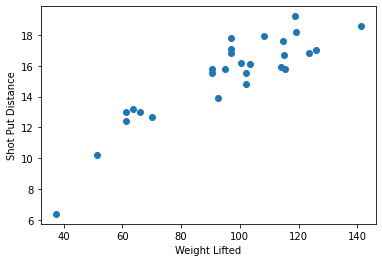

In [35]:
plt.scatter(shotput['Weight Lifted'], shotput['Shot Put Distance'])
plt.ylabel('Shot Put Distance')
plt.xlabel('Weight Lifted')
plt.show()

In [36]:
slope(shotput, 'Weight Lifted', 'Shot Put Distance')

0.09834382159781997

In [37]:
intercept(shotput, 'Weight Lifted', 'Shot Put Distance')

5.959629098373952

In [38]:
def shotput_linear_mse(any_slope, any_intercept):
    x = shotput['Weight Lifted']
    y = shotput['Shot Put Distance']
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [39]:
minimize(shotput_linear_mse)

array([0.09834382, 5.95962911])

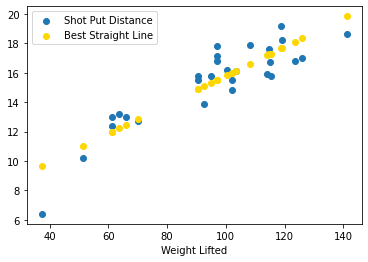

In [60]:
fitted = fit(shotput, 'Weight Lifted', 'Shot Put Distance')
plt.scatter(shotput['Weight Lifted'], shotput['Shot Put Distance'], label = 'Shot Put Distance')
plt.scatter(shotput['Weight Lifted'], fitted, label = 'Best Straight Line', color = 'gold')
plt.xlabel('Weight Lifted')
plt.legend(loc = 'upper left')
plt.show()

Nonlinear Regression

In [41]:
def shotput_quadratic_mse(a, b, c):
    x = shotput['Weight Lifted']
    y = shotput['Shot Put Distance']
    fitted = a*(x**2) + b*x + c
    return np.mean((y - fitted) ** 2)

In [42]:
best = minimize(shotput_quadratic_mse)
best

array([-1.04004838e-03,  2.82708045e-01, -1.53182115e+00])

In [43]:
(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

In [44]:
x = shotput.iloc[:,0]
shotput_fit = best[0]*(x**2) + best[1]*x + best[2]

In [45]:
#shotput.with_column('Best Quadratic Curve', shotput_fit).scatter(0)
shotput['Best Quadratic Curve']=shotput_fit
shotput

,Weight Lifted,Shot Put Distance,Best Quadratic Curve
0,37.5,6.4,7.607162
1,51.5,10.2,10.269175
2,61.3,12.4,11.890003
3,61.3,13.0,11.890003
4,63.6,13.2,12.241456
5,66.1,13.0,12.610991
6,70.0,12.7,13.161505
7,92.7,13.9,15.737777
8,90.5,15.5,15.535001
9,90.5,15.8,15.535001


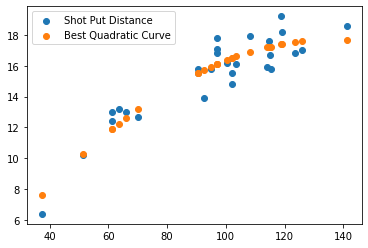

In [46]:
plt.scatter(shotput['Weight Lifted'],shotput['Shot Put Distance'])
plt.scatter(shotput['Weight Lifted'],shotput['Best Quadratic Curve'])
plt.legend(['Shot Put Distance','Best Quadratic Curve'])

Visual Diagnostics

In [66]:
def residual(table, x, y):
    return table[y] - fit(table, x, y)

In [67]:
path="C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/"
heights=pd.read_csv(path+"galton.csv")
heights=heights[['midparentHeight','childHeight']]
heights

,midparentHeight,childHeight
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


In [71]:
c= fit(heights, 'midparentHeight','childHeight')
heights['Fitted Value']=c
heights['Residual']= residual(heights, 'midparentHeight','childHeight')
    
heights

,midparentHeight,childHeight,Residual,Fitted Value
0,75.43,73.2,2.487627,70.712373
1,75.43,69.2,-1.512373,70.712373
2,75.43,69.0,-1.712373,70.712373
3,75.43,69.0,-1.712373,70.712373
4,73.66,73.5,3.915756,69.584244
...,...,...,...,...
929,66.64,64.0,-1.109971,65.109971
930,66.64,62.0,-3.109971,65.109971
931,66.64,61.0,-4.109971,65.109971
932,65.27,66.5,2.263214,64.236786


In [72]:
heights = heights.rename(columns ={'midparentHeight':'MidParent', 'childHeight':'Child'})
heights

,MidParent,Child,Residual,Fitted Value
0,75.43,73.2,2.487627,70.712373
1,75.43,69.2,-1.512373,70.712373
2,75.43,69.0,-1.712373,70.712373
3,75.43,69.0,-1.712373,70.712373
4,73.66,73.5,3.915756,69.584244
...,...,...,...,...
929,66.64,64.0,-1.109971,65.109971
930,66.64,62.0,-3.109971,65.109971
931,66.64,61.0,-4.109971,65.109971
932,65.27,66.5,2.263214,64.236786


In [73]:
def scatter_fit(table, x, y):
    plt.scatter(table[x], table[y], s=15)
    plt.plot(table[x], fit(table, x, y), lw=4, color='gold')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

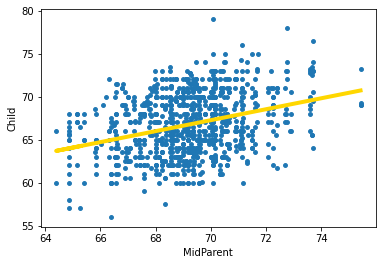

In [74]:
scatter_fit(heights, 'MidParent', 'Child')

In [79]:
def residual_plot(table, x, y):
    x_array = table[x]
    t = pd.DataFrame({
            x: x_array,
            'residuals': residual(table, x, y)
    })
    plt.scatter(t[x], t['residuals'], color='r')
    xlims = [min(x_array), max(x_array)]
    plt.plot(xlims,[0,0], color='darkblue', lw=4)
    plt.title('Residual Plot')

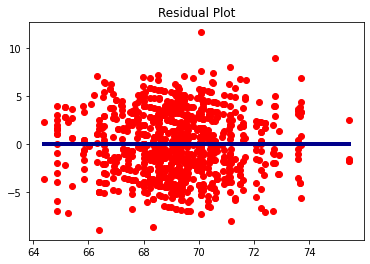

In [80]:
residual_plot(heights, 'MidParent', 'Child')

Regression Diagnostics

In [81]:
def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)

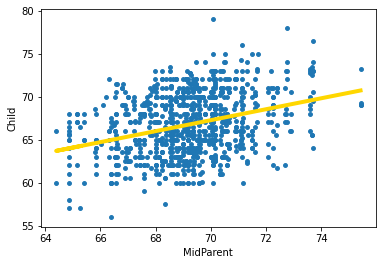

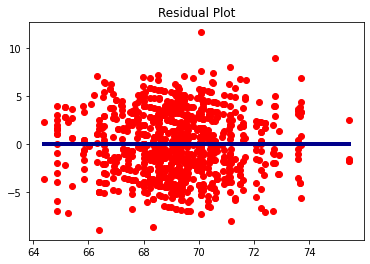

In [82]:
regression_diagnostic_plots(heights, 'MidParent', 'Child')

Detecting Nonlinearity

In [86]:
dugong = pd.read_csv(path+"dugong.csv")
dugong = dugong.set_index('Length').reset_index()
dugong

,Length,Age
0,1.80,1.0
1,1.85,1.5
2,1.87,1.5
3,1.77,1.5
4,2.02,2.5
5,2.27,4.0
6,2.15,5.0
7,2.26,5.0
8,2.35,7.0
9,2.47,8.0


In [87]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

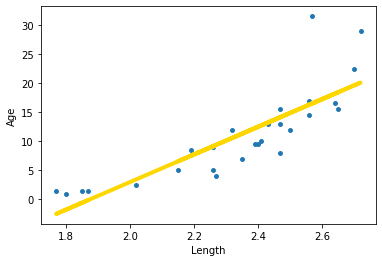

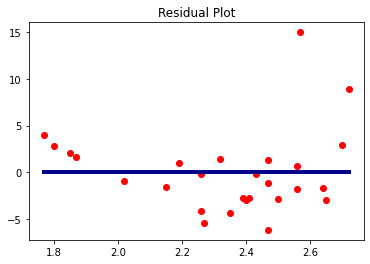

In [88]:
regression_diagnostic_plots(dugong, 'Length', 'Age')

Detecting Heteroscedasticity

In [90]:
hybrid=pd.read_csv(path+"hybrid.csv")

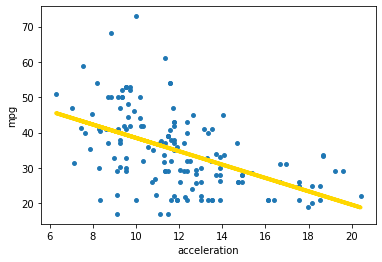

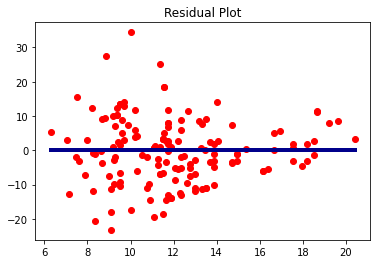

In [91]:
regression_diagnostic_plots(hybrid, 'acceleration', 'mpg')

Numerical Diagnostics

In [92]:
correlation(heights, 'MidParent', 'Residual')

-2.719689807647064e-16

In [93]:
round(correlation(heights, 'MidParent', 'Residual'), 10)

-0.0

In [94]:
dugong['Fitted Value']= fit(dugong, 'Length', 'Age')
dugong['Residual']= residual(dugong, 'Length', 'Age')

round(correlation(dugong, 'Length', 'Residual'), 10)

0.0

Average of Residuals

In [96]:
round(np.mean(heights['Residual']), 10)

0.0

In [97]:
round(np.mean(dugong['Residual']), 10)

0.0

SD of the Residuals

In [98]:
np.std(heights['Residual'])

3.3880799163953426

In [100]:
r = correlation(heights, 'MidParent', 'Child')
np.sqrt(1 - r**2) * np.std(heights.Child)

3.388079916395342

In [101]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

-0.5060703843771186

In [102]:
hybrid['fitted mpg']= fit(hybrid, 'acceleration', 'mpg')
hybrid['residual']= residual(hybrid, 'acceleration', 'mpg')

np.std(hybrid['residual']), np.sqrt(1 - r**2)*np.std(hybrid['mpg'])

(9.43273683343029, 9.43273683343029)

Another Way to Interpret  r 

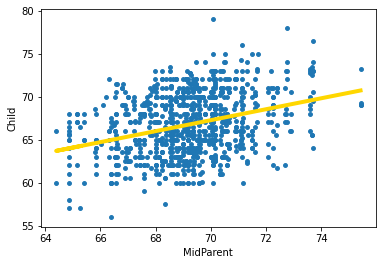

In [103]:
scatter_fit(heights, 'MidParent', 'Child')

In [104]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

In [105]:
np.std(heights['Fitted Value'])/np.std(heights['Child'])

0.32094989606395957

In [106]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

In [107]:
np.std(hybrid['fitted mpg'])/np.std(hybrid['mpg'])

0.5060703843771186